<a href="https://colab.research.google.com/github/Ahibala/Insurance-Premium-Prediction-/blob/main/Step_by_step_implementation_of_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries and loading the dataset

## Import libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix


## Data set

In [ ]:
# Loading the dataset to a pandas Dataframe 
DF=pd.read_csv('/content/drive/MyDrive/project/Machine_Learning/StudentSummerProgramData_Numeric_2NumLabeled_3Cols_final data.csv')
print(DF)

    Decision   GPA  WorkExp  TestScore
0          0  3.90      6.7        962
1          0  3.80      1.4        969
2          0  3.80      2.3        970
3          0  3.60      0.9        969
4          0  3.92      1.2        969
..       ...   ...      ...        ...
58         1  3.33      0.8        768
59         1  2.91      6.2        753
60         1  3.56      1.7        769
61         1  2.85      4.6        762
62         1  3.21      1.7        766

[63 rows x 4 columns]


# Data preprocessing 

## Set y to the label. Check the shape!

In [ ]:
y = np.array(DF.iloc[:,0]).T
y = np.array([y]).T
print("y is\n", y)

y is
 [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


## Normalize the data 

In [ ]:
## Normalize the data (not the label!)
## or min/max
## normalized_df=(df-df.min())/(df.max()-df.min())

DF=DF.iloc[:, [1, 2, 3]]
DF=(DF-DF.mean())/DF.std()
print(DF)

X = np.array(DF)

print("X is\n", X)

         GPA   WorkExp  TestScore
0   1.035997  2.535365   0.834600
1   0.756477 -0.371772   0.906768
2   0.756477  0.121893   0.917078
3   0.197438 -0.646030   0.906768
4   1.091901 -0.481476   0.906768
..       ...       ...        ...
58 -0.557264 -0.700882  -1.165494
59 -1.731246  2.261107  -1.320141
60  0.085631 -0.207217  -1.155185
61 -1.898958  1.383480  -1.227353
62 -0.892688 -0.207217  -1.186114

[63 rows x 3 columns]
X is
 [[ 1.03599692  2.53536477  0.83460008]
 [ 0.75647741 -0.37177224  0.90676843]
 [ 0.75647741  0.12189254  0.9170782 ]
 [ 0.19743838 -0.64603045  0.90676843]
 [ 1.09190082 -0.48147552  0.90676843]
 [ 0.75647741 -0.48147552  0.8861489 ]
 [ 0.98009302 -0.3169206   0.8861489 ]
 [ 0.4769579  -0.48147552  0.90676843]
 [ 1.03599692  1.43833194  0.82429031]
 [ 0.4769579  -0.37177224  0.87583914]
 [ 0.75647741 -0.20721731  0.89645867]
 [ 1.11985277 -0.70088209  0.90676843]
 [ 0.19743838 -0.48147552  0.8861489 ]
 [ 0.44900594  0.61555731  0.8861489 ]
 [ 0.4769579   0.

## Initializing the input for neural network

In [ ]:
InputColumns = 3
NumberOfLabels = 2
n = len(DF) ## number of rows of entire X
## Take the label off of X and make it a numpy array

# Assuming the learning rate 

LR=.01
LRB = .01

# Defining the Neural Network class and its methods:

In [ ]:
class NeuralNetwork(object):
  def __init__(self):        
    self.InputNumColumns = InputColumns  ## columns
    self.OutputSize = 1 ## Categories
    self.HiddenUnits = 4  ## one layer with h units
    self.n = n  ## number of training examples, n
    
    print("Initialize NN\n")
    #Random W1
    self.W1 = np.random.randn(self.InputNumColumns, self.HiddenUnits) # c by h  
    
    print("INIT W1 is\n", self.W1)
    
    ##-----------------------------------------
    ## NOTE ##
    ##
    ## The following are all random. However, you can comment this out
    ## and can set any weights and biases by hand , etc.
    ##
    ##---------------------------------------------
    
    self.W2 = np.random.randn(self.HiddenUnits, self.OutputSize) # h by o 
    print("W2 is:\n", self.W2)
    
    self.b = np.random.randn(1, self.HiddenUnits)
    print("The b's are:\n", self.b)
    ## biases for layer 1
    
    self.c = np.random.randn(1, self.OutputSize)
    print("The c is\n", self.c)
    ## bias for last layer

  def FeedForward(self, X):
      print("FeedForward\n\n")
      self.z = (np.dot(X, self.W1)) + self.b 
      #X is n by c   W1  is c by h -->  n by h
      print("Z1 is:\n", self.z)
      
      self.h = self.Sigmoid(self.z) #activation function    shape: n by h
      print("H is:\n", self.h)
      
      self.z2 = (np.dot(self.h, self.W2)) + self.c # n by h  @  h by o  -->  n by o  
      print("Z2 is:\n", self.z2)
      
      ## Using Softmax for the output activation
      output = self.Sigmoid(self.z2)  
      print("output Y^ is:\n", output)
      return output

  def Sigmoid(self, s, deriv=False):
    if (deriv == True):
      return s * (1 - s)
    return 1/(1 + np.exp(-s))

  def BackProp(self, X, y, output):


    print("\n\nBackProp\n")

    # Learning rates for weights and biases
    self.LR = LR
    self.LRB = LRB

    # Output error (Y^ - Y)
    self.output_error = output - y
    print("Y^ - Y\n", self.output_error)

        ## NOTE TO READER........................
    ## Here - we DO NOT multiply by derivative of Sig for y^ b/c we are using 
    ## cross entropy and softmax for the loss and last activation
    # REMOVED # self.output_delta = self.output_error * self.Sigmoid(output, deriv=True) 
    ## So the above line is commented out...............
    

    # Output delta (Y^ - Y)
    self.output_delta = self.output_error

    #..............Backpropagation output -> hidden (cost function derivative)......................
    
    # Compute the error contribution from hidden layer to output layer (Y^ - Y)(W2)
    self.D_Error_W2 = self.output_delta.dot(self.W2.T)

    # Compute the gradient for W2: h.T * output_delta
    self.h_output_delta = self.h.T.dot(self.output_delta)

    # Update W2 using the learning rate and the gradient
    self.W2 = self.W2 - self.LR * self.h_output_delta

    # Update bias c
    self.c = self.c - self.LR * np.mean(self.output_delta, axis=0)

    #................Backpropagation hidden -> input (activation function derivative)....................

    # Compute the gradient for the hidden layer: (H)(1 - H) (Y^ - Y)(W2)
    self.H_D_Error_W2 = self.D_Error_W2 * self.Sigmoid(self.h, deriv=True)

    # Compute the gradient for W1: X.T * H_D_Error_W2
    self.X_H_D_Error_W2 = X.T.dot(self.H_D_Error_W2)

    # Update W1 using the learning rate and the gradient
    self.W1 = self.W1 - self.LR * self.X_H_D_Error_W2

    # Update biases b
    self.b = self.b - self.LRB * np.mean(self.H_D_Error_W2, axis=0)

    # Print updated weights and gradients
    print("The W1 is: \n", self.W1)
    print("The W1 gradient is: \n", self.X_H_D_Error_W2)
    print("The W2 gradient is: \n", self.h_output_delta)
    print("The biases b gradient is:\n", np.mean(self.H_D_Error_W2, axis=0))
    print("The bias c gradient is: \n", np.mean(self.output_delta, axis=0))


  def TrainNetwork(self, X, y):
    output = self.FeedForward(X)
    print("Output in TNN\n", output)
    self.BackProp(X, y, output)
    return output

# Creating Neural Network class and training it

In [ ]:
MyNN = NeuralNetwork()

TotalLoss=[]
AvgLoss=[]
Epochs=500

for i in range(Epochs): 
    print("\nRUN:\n ", i)
    output=MyNN.TrainNetwork(X, y)
   
    #print("The y is ...\n", y)
    print("The output is: \n", output)
    output=np.where(output > 0.5, 1, 0)
    print('Prediction y^ is', output)
    ## Using Categorical Cross Entropy...........
    #loss = np.mean(-y * np.log(output))  ## We need y to place the "1" in the right place
    loss=np.sum(np.square(output-y))
    avgLoss=np.mean(np.square(output-y))
    print("The current average loss is\n", loss)
    TotalLoss.append(loss)
    AvgLoss.append(avgLoss)

Streaming output truncated to the last 5000 lines.
 [-0.00942687 -0.00318151  0.01148396  0.03892472]
 [-0.14063169 -0.16753517 -0.10467526  0.02809763]]
The W2 gradient is: 
 [[-0.22080994]
 [ 0.08280604]
 [ 0.09525797]
 [ 0.02150354]]
The biases b gradient is:
 [-0.00408104  0.01553053  0.00837371  0.00029766]
The bias c gradient is: 
 [-0.00495684]
The output is: 
 [[0.07690641]
 [0.01648476]
 [0.01740186]
 [0.01826475]
 [0.01578931]
 [0.01691222]
 [0.01701743]
 [0.01716977]
 [0.03980885]
 [0.01835867]
 [0.01721151]
 [0.01523336]
 [0.01911576]
 [0.02101583]
 [0.0211838 ]
 [0.02471658]
 [0.01739732]
 [0.95789377]
 [0.0210991 ]
 [0.02050701]
 [0.01658019]
 [0.01850684]
 [0.10552471]
 [0.02053528]
 [0.02040001]
 [0.01939349]
 [0.01511017]
 [0.02079666]
 [0.0189758 ]
 [0.02244293]
 [0.01672849]
 [0.01562139]
 [0.01873869]
 [0.01669358]
 [0.01779162]
 [0.37301411]
 [0.70838342]
 [0.96415308]
 [0.95584278]
 [0.96709119]
 [0.97710538]
 [0.42981548]
 [0.98337775]
 [0.95953991]
 [0.97644878]

# visualizing the results

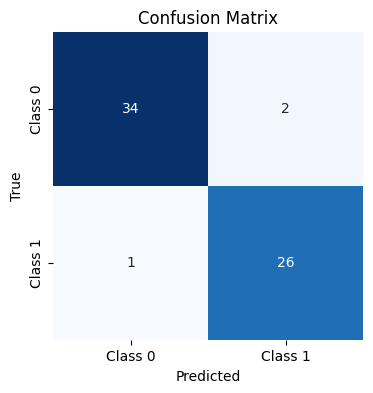

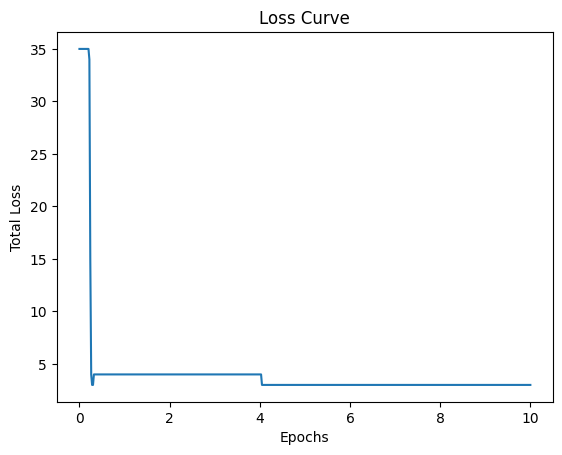

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(output, y)

# Plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot the loss curve
plt.figure()
plt.plot(np.linspace(0, 10, Epochs), TotalLoss)
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.title('Loss Curve')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(output, y)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.9523809523809523
